## BaseLine

### Library

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 80.1 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import torch
import yaml
import warnings
from ultralytics import YOLO
from tqdm import tqdm
from pathlib import Path
warnings.filterwarnings('ignore')
import sys

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# 환경에 따라 PROJECT_ROOT 설정
if IN_COLAB:
    PROJECT_ROOT = Path("/content/drive/MyDrive/likelion/PCB")
else:
    PROJECT_ROOT = Path.cwd().parent

# sys.path 추가 (import용)
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

# 작업 디렉토리 변경 (파일 접근용) - 중요!
os.chdir(PROJECT_ROOT)

print(f"Environment: {'Colab' if IN_COLAB else 'Local'}")
print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"Current working directory: {os.getcwd()}")

Environment: Local
PROJECT_ROOT: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB
Current working directory: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB


In [4]:
!nvidia-smi

Tue Jan 13 14:22:27 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   34C    P0             56W /  400W |       0MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

### Train

In [2]:
from src.training.train import train_model
from src.models.model_factory import ModelFactory
from src.utils.config import load_config

config_path = f"{PROJECT_ROOT}/configs/config.yaml"
config = load_config(config_path)
config

{'model': {'type': 'yolo11', 'size': 'l', 'pretrained': True},
 'data': {'data_yaml': 'dataset/roboflow/data.yaml', 'img_size': 640},
 'training': {'epochs': 100,
  'batch_size': 32,
  'device': 'cuda',
  'workers': 8,
  'patience': 10,
  'save_period': -1,
  'save_dir': 'outputs'},
 'augmentation': {'enabled': False,
  'pcb_optimized': False,
  'exclude_classes': []},
 'wandb': {'enabled': True,
  'project': 'PCB_Detection',
  'suffix': 'roboflow_base'},
 'experiment': {'suffix': 'roboflow_base', 'seed': 42}}

In [6]:
train_model(config_path=config_path)

2026-01-13 14:22:56 - INFO - Starting training...
INFO:PCB_Detection:Starting training...
2026-01-13 14:22:56 - INFO - Config: /content/drive/MyDrive/likelion/PCB/configs/config.yaml
INFO:PCB_Detection:Config: /content/drive/MyDrive/likelion/PCB/configs/config.yaml
2026-01-13 14:22:56 - INFO - Project root: /content/drive/MyDrive/likelion/PCB
INFO:PCB_Detection:Project root: /content/drive/MyDrive/likelion/PCB
2026-01-13 14:22:56 - INFO - Working directory: /content/drive/MyDrive/likelion/PCB
INFO:PCB_Detection:Working directory: /content/drive/MyDrive/likelion/PCB
2026-01-13 14:22:56 - INFO - Logs will be saved to: /content/drive/MyDrive/likelion/PCB/logs/yolo11l-roboflow_base
INFO:PCB_Detection:Logs will be saved to: /content/drive/MyDrive/likelion/PCB/logs/yolo11l-roboflow_base
2026-01-13 14:22:56 - INFO - Seed fixed to 42
INFO:PCB_Detection:Seed fixed to 42
2026-01-13 14:22:56 - INFO - Using device: cuda
INFO:PCB_Detection:Using device: cuda
2026-01-13 14:22:56 - INFO - GPU: NVIDIA

2026-01-13 14:22:57 - INFO - Ultralytics wandb integration enabled via settings (before init)
INFO:PCB_Detection:Ultralytics wandb integration enabled via settings (before init)
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: moonstalker9010 (moonstalker9010-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


2026-01-13 14:23:05 - INFO - W&B initialized for YOLO: project='PCB_Detection', name='yolo11l-roboflow_base'
INFO:PCB_Detection:W&B initialized for YOLO: project='PCB_Detection', name='yolo11l-roboflow_base'
2026-01-13 14:23:05 - INFO - Custom W&B callback registered for loss logging
INFO:PCB_Detection:Custom W&B callback registered for loss logging
2026-01-13 14:23:05 - INFO - Training parameters: {'data': '/content/drive/MyDrive/likelion/PCB/dataset/roboflow/data.yaml', 'epochs': 100, 'batch': 32, 'imgsz': 640, 'patience': 10, 'device': device(type='cuda'), 'workers': 8, 'save': True, 'save_period': -1, 'project': '/content/drive/MyDrive/likelion/PCB/outputs', 'name': 'yolo11l-roboflow_base', 'val': True, 'plots': False, 'verbose': False}
INFO:PCB_Detection:Training parameters: {'data': '/content/drive/MyDrive/likelion/PCB/dataset/roboflow/data.yaml', 'epochs': 100, 'batch': 32, 'imgsz': 640, 'patience': 10, 'device': device(type='cuda'), 'workers': 8, 'save': True, 'save_period': -1

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/likelion/PCB/dataset/roboflow/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11l-roboflow_base, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=False, pose=12.0, pretrained=True, profile=Fa

wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      2/100      24.5G      2.681      3.479      1.681         41        640: 100% ━━━━━━━━━━━━ 182/182 3.0it/s 1:000.3sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.519      0.555      0.554      0.236
Epoch 2/100 - Train Loss: 7.8407, Val Loss: 5.0905, mAP50: 0.5541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/100      24.5G      2.574      3.407      1.631         57        640: 14% ━╸────────── 25/182 3.3it/s 8.1s<47.3s

wandb: WARNING Tried to log to step 1 that is less than the current step 2. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      3/100      24.5G      2.611        3.4      1.611         28        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.3it/s 2.7s0.3s
                   all        556        642      0.383      0.526      0.484      0.203
Epoch 3/100 - Train Loss: 7.6220, Val Loss: 6.4375, mAP50: 0.4839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      4/100      24.5G      2.625      3.352      1.612         40        640: 12% ━─────────── 22/182 3.2it/s 7.2s<50.5s

wandb: WARNING Tried to log to step 2 that is less than the current step 3. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      4/100      24.5G      2.522      3.185      1.573         23        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.582      0.574      0.638      0.241
Epoch 4/100 - Train Loss: 7.2800, Val Loss: 5.2190, mAP50: 0.6381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      5/100      24.5G      2.469       3.24      1.531         50        640: 10% ━─────────── 18/182 3.2it/s 6.0s<51.6s

wandb: WARNING Tried to log to step 3 that is less than the current step 4. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      5/100      24.5G       2.46      3.072      1.539         46        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642      0.634      0.702      0.699      0.308
Epoch 5/100 - Train Loss: 7.0713, Val Loss: 4.6894, mAP50: 0.6992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      6/100      24.6G       2.35      2.807      1.491         49        640: 8% ╸─────────── 14/182 3.1it/s 4.7s<54.0s

wandb: WARNING Tried to log to step 4 that is less than the current step 5. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      6/100      24.6G      2.337      2.852      1.483         23        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.6s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642       0.84      0.771      0.814      0.385
Epoch 6/100 - Train Loss: 6.6724, Val Loss: 4.3646, mAP50: 0.8137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      24.6G       2.28      2.817      1.449         33        640: 5% ╸─────────── 9/182 3.1it/s 3.2s<55.5s

wandb: WARNING Tried to log to step 5 that is less than the current step 6. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      7/100      24.6G      2.318      2.873      1.459         36        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.909      0.796      0.848      0.422
Epoch 7/100 - Train Loss: 6.6501, Val Loss: 4.1434, mAP50: 0.8478

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      24.6G      2.253      2.751      1.438         30        640: 3% ──────────── 5/182 2.7it/s 1.9s<1:06

wandb: WARNING Tried to log to step 6 that is less than the current step 7. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      8/100      24.6G      2.249      2.757      1.422         24        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.892      0.771      0.847      0.427
Epoch 8/100 - Train Loss: 6.4280, Val Loss: 4.1069, mAP50: 0.8471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      24.6G       2.29      2.737      1.425         63        640: 1% ──────────── 1/182 1.1it/s 0.6s<2:48

wandb: WARNING Tried to log to step 7 that is less than the current step 8. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


      9/100      24.6G      2.294      2.807       1.44         45        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.864      0.819      0.852      0.413
Epoch 9/100 - Train Loss: 6.5415, Val Loss: 4.1996, mAP50: 0.8521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/100      24.6G      2.201      2.607      1.402         65        640: 16% ━╸────────── 30/182 3.2it/s 9.8s<47.3s

wandb: WARNING Tried to log to step 8 that is less than the current step 9. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     10/100      24.6G      2.218      2.669      1.418         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.4it/s 2.6s0.3s
                   all        556        642      0.908      0.823      0.867      0.436
Epoch 10/100 - Train Loss: 6.3047, Val Loss: 4.0778, mAP50: 0.8672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/100      24.6G      2.218      2.771      1.417         61        640: 14% ━╸────────── 25/182 3.3it/s 8.2s<47.1s

wandb: WARNING Tried to log to step 9 that is less than the current step 10. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     11/100      24.6G      2.199      2.688       1.41         30        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.921      0.867      0.891      0.454
Epoch 11/100 - Train Loss: 6.2963, Val Loss: 3.9922, mAP50: 0.8905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/100      24.6G      2.178      2.602       1.37         67        640: 11% ━─────────── 20/182 3.2it/s 6.6s<50.7s

wandb: WARNING Tried to log to step 10 that is less than the current step 11. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     12/100      24.6G      2.185      2.639      1.398         38        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.927      0.822      0.871      0.427
Epoch 12/100 - Train Loss: 6.2221, Val Loss: 4.0802, mAP50: 0.8706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     13/100      24.6G      2.164      2.674      1.385         40        640: 10% ━─────────── 18/182 3.2it/s 6.0s<51.7s

wandb: WARNING Tried to log to step 11 that is less than the current step 12. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     13/100      24.6G       2.17      2.622      1.387         26        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.936      0.839      0.886      0.462
Epoch 13/100 - Train Loss: 6.1789, Val Loss: 3.9145, mAP50: 0.8862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     14/100      24.6G      2.074      2.477      1.348         55        640: 8% ╸─────────── 15/182 3.3it/s 5.0s<51.2s

wandb: WARNING Tried to log to step 12 that is less than the current step 13. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     14/100      24.6G      2.121      2.529      1.368         36        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.911      0.844      0.892      0.467
Epoch 14/100 - Train Loss: 6.0182, Val Loss: 3.8614, mAP50: 0.8924

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     15/100      24.6G      2.116      2.671       1.38         41        640: 6% ╸─────────── 11/182 3.2it/s 3.8s<53.6s

wandb: WARNING Tried to log to step 13 that is less than the current step 14. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     15/100      24.6G      2.126      2.538      1.379         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.903      0.841      0.871      0.428
Epoch 15/100 - Train Loss: 6.0427, Val Loss: 4.0652, mAP50: 0.8714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     16/100      24.6G      2.249      2.642      1.388         69        640: 4% ──────────── 7/182 3.0it/s 2.5s<57.9s

wandb: WARNING Tried to log to step 14 that is less than the current step 15. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     16/100      24.6G      2.113      2.567      1.364         38        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.906      0.859      0.886      0.468
Epoch 16/100 - Train Loss: 6.0439, Val Loss: 3.8204, mAP50: 0.8862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     17/100      24.6G      2.177      2.711      1.374         41        640: 2% ──────────── 4/182 2.4it/s 1.6s<1:15

wandb: WARNING Tried to log to step 15 that is less than the current step 16. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     17/100      24.6G      2.115      2.522      1.359         24        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642       0.92      0.859       0.89      0.449
Epoch 17/100 - Train Loss: 5.9961, Val Loss: 3.9191, mAP50: 0.8901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     18/100      24.6G      1.957      2.423      1.291         47        640: 1% ──────────── 1/182 1.1it/s 0.6s<2:49

wandb: WARNING Tried to log to step 16 that is less than the current step 17. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     18/100      24.6G      2.055      2.465      1.329         37        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.943      0.841      0.902      0.488
Epoch 18/100 - Train Loss: 5.8493, Val Loss: 3.8286, mAP50: 0.9019

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     19/100      24.6G      2.142      2.664      1.371         39        640: 16% ━╸────────── 29/182 3.3it/s 9.4s<45.9s

wandb: WARNING Tried to log to step 17 that is less than the current step 18. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     19/100      24.6G      2.057      2.473      1.336         22        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642      0.948      0.845      0.889      0.473
Epoch 19/100 - Train Loss: 5.8672, Val Loss: 3.9050, mAP50: 0.8890

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     20/100      24.6G      2.131      2.687      1.372         56        640: 14% ━╸────────── 26/182 3.2it/s 8.5s<49.3s

wandb: WARNING Tried to log to step 18 that is less than the current step 19. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     20/100      24.6G      2.073      2.505      1.349         20        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.934      0.866      0.907       0.49
Epoch 20/100 - Train Loss: 5.9262, Val Loss: 3.7339, mAP50: 0.9075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     21/100      24.6G      2.097      2.595      1.336         47        640: 12% ━─────────── 22/182 3.2it/s 7.3s<50.7s

wandb: WARNING Tried to log to step 19 that is less than the current step 20. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     21/100      24.6G      2.054      2.458      1.334         27        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.968      0.865        0.9      0.467
Epoch 21/100 - Train Loss: 5.8460, Val Loss: 3.8756, mAP50: 0.8996

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     22/100      24.6G      2.008      2.319      1.324         58        640: 10% ━─────────── 19/182 3.3it/s 6.2s<50.0s

wandb: WARNING Tried to log to step 20 that is less than the current step 21. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     22/100      24.6G      2.014      2.392      1.324         24        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.962      0.843      0.901      0.488
Epoch 22/100 - Train Loss: 5.7300, Val Loss: 3.7965, mAP50: 0.9006

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     23/100      24.6G      2.058      2.517      1.347         70        640: 9% ━─────────── 17/182 3.3it/s 5.7s<50.3s

wandb: WARNING Tried to log to step 21 that is less than the current step 22. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     23/100      24.6G      2.043      2.462      1.339         39        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.933      0.874      0.903      0.467
Epoch 23/100 - Train Loss: 5.8436, Val Loss: 3.8473, mAP50: 0.9033

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     24/100      24.6G      2.077      2.529      1.328         46        640: 8% ╸─────────── 15/182 3.3it/s 5.0s<51.0s

wandb: WARNING Tried to log to step 22 that is less than the current step 23. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     24/100      24.6G      2.007      2.409      1.315         20        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.938      0.874      0.907       0.49
Epoch 24/100 - Train Loss: 5.7301, Val Loss: 3.8034, mAP50: 0.9072

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     25/100      24.6G      2.025      2.515      1.354         54        640: 7% ╸─────────── 12/182 3.1it/s 4.1s<54.4s

wandb: WARNING Tried to log to step 23 that is less than the current step 24. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     25/100      24.6G      2.016      2.435      1.322         37        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642       0.96      0.866      0.905      0.504
Epoch 25/100 - Train Loss: 5.7739, Val Loss: 3.7135, mAP50: 0.9055

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     26/100      24.6G      2.083      2.576      1.335         52        640: 5% ╸─────────── 9/182 3.2it/s 3.1s<54.5s

wandb: WARNING Tried to log to step 24 that is less than the current step 25. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     26/100      24.6G      1.991      2.424      1.312         30        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.955      0.885      0.908      0.482
Epoch 26/100 - Train Loss: 5.7277, Val Loss: 3.7397, mAP50: 0.9078

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     27/100      24.6G      2.001      2.425      1.326         48        640: 3% ──────────── 6/182 2.8it/s 2.2s<1:03

wandb: WARNING Tried to log to step 25 that is less than the current step 26. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     27/100      24.6G      1.993      2.424      1.322         27        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642      0.951      0.879      0.904      0.498
Epoch 27/100 - Train Loss: 5.7393, Val Loss: 3.6950, mAP50: 0.9042

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      24.6G       1.93      2.269      1.308         63        640: 2% ──────────── 3/182 2.2it/s 1.2s<1:21

wandb: WARNING Tried to log to step 26 that is less than the current step 27. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     28/100      24.6G      1.963      2.342      1.295         22        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.957      0.863      0.899      0.503
Epoch 28/100 - Train Loss: 5.5993, Val Loss: 3.6302, mAP50: 0.8987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      24.6G      1.893      2.747      1.417         38        640: 1% ──────────── 1/182 1.1it/s 0.6s<2:48

wandb: WARNING Tried to log to step 27 that is less than the current step 28. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     29/100      24.6G      1.965      2.379      1.306         19        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.0s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.953      0.898      0.918      0.502
Epoch 29/100 - Train Loss: 5.6495, Val Loss: 3.6479, mAP50: 0.9179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


wandb: WARNING Tried to log to step 28 that is less than the current step 29. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     30/100      24.6G      1.961      2.355      1.302         39        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.959      0.892      0.916      0.493
Epoch 30/100 - Train Loss: 5.6177, Val Loss: 3.6937, mAP50: 0.9155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     31/100      24.6G      1.957      2.384       1.29         43        640: 15% ━╸────────── 28/182 3.2it/s 9.1s<47.7s

wandb: WARNING Tried to log to step 29 that is less than the current step 30. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     31/100      24.6G      1.964      2.396      1.301         38        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.0s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.963      0.884      0.913      0.501
Epoch 31/100 - Train Loss: 5.6612, Val Loss: 3.6586, mAP50: 0.9126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     32/100      24.6G      1.928      2.347      1.301         71        640: 14% ━╸────────── 25/182 3.3it/s 8.1s<47.2s

wandb: WARNING Tried to log to step 30 that is less than the current step 31. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     32/100      24.6G      1.931      2.322       1.29         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.966      0.885      0.917      0.518
Epoch 32/100 - Train Loss: 5.5425, Val Loss: 3.5864, mAP50: 0.9174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     33/100      24.6G      1.924      2.393      1.279         37        640: 12% ━─────────── 21/182 3.3it/s 6.9s<49.4s

wandb: WARNING Tried to log to step 31 that is less than the current step 32. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     33/100      24.6G      1.898      2.322      1.279         35        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.966      0.891      0.913      0.514
Epoch 33/100 - Train Loss: 5.4985, Val Loss: 3.6095, mAP50: 0.9133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     34/100      24.6G       1.98      2.344      1.285         53        640: 10% ━─────────── 19/182 3.3it/s 6.3s<50.0s

wandb: WARNING Tried to log to step 32 that is less than the current step 33. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     34/100      24.6G      1.922      2.351      1.279         37        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.7s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.954       0.89      0.912      0.522
Epoch 34/100 - Train Loss: 5.5516, Val Loss: 3.5844, mAP50: 0.9124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/100      24.6G      1.917      2.427      1.263         51        640: 5% ╸─────────── 10/182 3.1it/s 3.5s<56.2s

wandb: WARNING Tried to log to step 33 that is less than the current step 34. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     35/100      24.6G      1.905      2.341      1.273         30        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642      0.963      0.867      0.904      0.505
Epoch 35/100 - Train Loss: 5.5193, Val Loss: 3.6799, mAP50: 0.9044

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/100      24.6G      1.848      2.158      1.244         48        640: 4% ──────────── 7/182 3.0it/s 2.5s<58.0s

wandb: WARNING Tried to log to step 34 that is less than the current step 35. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     36/100      24.6G        1.9      2.307      1.274         16        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.966      0.888      0.919       0.52
Epoch 36/100 - Train Loss: 5.4807, Val Loss: 3.5567, mAP50: 0.9191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/100      24.6G       1.99      2.322      1.363         52        640: 3% ──────────── 5/182 2.8it/s 1.9s<1:04

wandb: WARNING Tried to log to step 35 that is less than the current step 36. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     37/100      24.6G      1.887      2.289      1.276         25        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.962      0.878      0.912      0.509
Epoch 37/100 - Train Loss: 5.4518, Val Loss: 3.6011, mAP50: 0.9122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     38/100      24.6G      2.012      2.602      1.352         69        640: 1% ──────────── 2/182 1.6it/s 1.0s<1:53

wandb: WARNING Tried to log to step 36 that is less than the current step 37. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     38/100      24.6G       1.84       2.23      1.254         28        640: 100% ━━━━━━━━━━━━ 182/182 2.2it/s 1:240.3sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.977      0.872      0.913      0.518
Epoch 38/100 - Train Loss: 5.3234, Val Loss: 3.5501, mAP50: 0.9127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     39/100      24.6G      1.801      2.259      1.238         64        640: 5% ╸─────────── 9/182 3.1it/s 3.1s<55.1s

wandb: WARNING Tried to log to step 37 that is less than the current step 38. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     39/100      24.6G      1.882      2.327      1.266         32        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.967      0.886      0.918      0.523
Epoch 39/100 - Train Loss: 5.4754, Val Loss: 3.5486, mAP50: 0.9179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     40/100      24.6G      1.857      2.282      1.275         62        640: 3% ──────────── 6/182 2.8it/s 2.2s<1:04

wandb: WARNING Tried to log to step 38 that is less than the current step 39. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     40/100      24.6G       1.85      2.302      1.257         45        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.962      0.892      0.917      0.516
Epoch 40/100 - Train Loss: 5.4101, Val Loss: 3.5242, mAP50: 0.9175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     41/100      24.6G      1.726      1.948      1.193         60        640: 2% ──────────── 3/182 2.2it/s 1.2s<1:21

wandb: WARNING Tried to log to step 39 that is less than the current step 40. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     41/100      24.6G      1.836      2.257      1.248         23        640: 100% ━━━━━━━━━━━━ 182/182 2.2it/s 1:240.3sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.957      0.894      0.912       0.52
Epoch 41/100 - Train Loss: 5.3415, Val Loss: 3.5407, mAP50: 0.9122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     42/100      24.6G      1.862       2.34      1.239         86        640: 5% ╸─────────── 10/182 3.1it/s 3.5s<56.2s

wandb: WARNING Tried to log to step 40 that is less than the current step 41. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     42/100      24.6G      1.855      2.295      1.257         31        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.963      0.898      0.914      0.512
Epoch 42/100 - Train Loss: 5.4068, Val Loss: 3.5736, mAP50: 0.9141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     43/100      24.6G      1.774      2.224      1.255         77        640: 4% ╸─────────── 8/182 3.0it/s 2.8s<58.4s

wandb: WARNING Tried to log to step 41 that is less than the current step 42. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     43/100      24.6G      1.848      2.268       1.25         19        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.966      0.888      0.911      0.522
Epoch 43/100 - Train Loss: 5.3657, Val Loss: 3.5079, mAP50: 0.9114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     44/100      24.6G      1.863      2.375      1.264         54        640: 3% ──────────── 5/182 2.7it/s 1.9s<1:04

wandb: WARNING Tried to log to step 42 that is less than the current step 43. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     44/100      24.6G      1.818      2.224      1.249         24        640: 100% ━━━━━━━━━━━━ 182/182 2.1it/s 1:250.3sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.961      0.895      0.917      0.518
Epoch 44/100 - Train Loss: 5.2910, Val Loss: 3.5665, mAP50: 0.9171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     45/100      24.6G      1.749      2.142      1.241         54        640: 5% ╸─────────── 9/182 3.1it/s 3.1s<55.0s

wandb: WARNING Tried to log to step 43 that is less than the current step 44. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     45/100      24.6G      1.799      2.196      1.243         26        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.953       0.88      0.908      0.515
Epoch 45/100 - Train Loss: 5.2388, Val Loss: 3.5326, mAP50: 0.9079

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     46/100      24.6G      1.956      2.475      1.283         58        640: 3% ──────────── 5/182 2.7it/s 1.9s<1:07

wandb: WARNING Tried to log to step 44 that is less than the current step 45. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     46/100      24.6G      1.812      2.237      1.242         31        640: 100% ━━━━━━━━━━━━ 182/182 2.1it/s 1:270.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.962      0.893      0.917      0.518
Epoch 46/100 - Train Loss: 5.2910, Val Loss: 3.5567, mAP50: 0.9172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/100      24.6G      1.732      2.059      1.227         31        640: 3% ──────────── 5/182 2.7it/s 1.9s<1:05

wandb: WARNING Tried to log to step 45 that is less than the current step 46. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     47/100      24.6G      1.797      2.196      1.236         21        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.961      0.889      0.911       0.52
Epoch 47/100 - Train Loss: 5.2284, Val Loss: 3.4934, mAP50: 0.9114

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100      24.6G      1.701        1.9      1.176         46        640: 1% ──────────── 1/182 1.1it/s 0.6s<2:48

wandb: WARNING Tried to log to step 46 that is less than the current step 47. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     48/100      24.6G      1.806      2.251      1.243         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.961      0.884      0.916      0.523
Epoch 48/100 - Train Loss: 5.3001, Val Loss: 3.5034, mAP50: 0.9165

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     49/100      24.6G      1.821      2.241      1.247         54        640: 16% ━╸────────── 30/182 3.2it/s 9.7s<46.8s

wandb: WARNING Tried to log to step 47 that is less than the current step 48. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     49/100      24.6G      1.789      2.211      1.232         41        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.972      0.894      0.923      0.532
Epoch 49/100 - Train Loss: 5.2322, Val Loss: 3.5128, mAP50: 0.9228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     50/100      24.6G      1.744      2.151      1.218         68        640: 14% ━╸────────── 25/182 3.3it/s 8.2s<47.7s

wandb: WARNING Tried to log to step 48 that is less than the current step 49. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     50/100      24.6G      1.773      2.218      1.229         21        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.4s0.3s
                   all        556        642      0.964      0.895      0.921      0.529
Epoch 50/100 - Train Loss: 5.2193, Val Loss: 3.4387, mAP50: 0.9207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     51/100      24.6G      1.772      2.252      1.238         45        640: 13% ━╸────────── 23/182 3.3it/s 7.5s<48.7s

wandb: WARNING Tried to log to step 49 that is less than the current step 50. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     51/100      24.6G      1.751      2.193      1.227         17        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.5s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642      0.962      0.893      0.912      0.529
Epoch 51/100 - Train Loss: 5.1706, Val Loss: 3.4640, mAP50: 0.9120

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     52/100      24.6G      1.763      2.177      1.226         61        640: 10% ━─────────── 19/182 3.3it/s 6.3s<49.7s

wandb: WARNING Tried to log to step 50 that is less than the current step 51. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     52/100      24.6G      1.762      2.236      1.229         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 56.9s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.959      0.893      0.909      0.512
Epoch 52/100 - Train Loss: 5.2269, Val Loss: 3.5259, mAP50: 0.9092

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     53/100      24.6G      1.754      2.133      1.233         45        640: 9% ━─────────── 17/182 3.3it/s 5.6s<50.3s

wandb: WARNING Tried to log to step 51 that is less than the current step 52. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     53/100      24.6G      1.779       2.22      1.235         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.961      0.892      0.908      0.522
Epoch 53/100 - Train Loss: 5.2339, Val Loss: 3.4758, mAP50: 0.9083

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     54/100      24.6G      1.679      2.098      1.185         56        640: 8% ╸─────────── 14/182 3.1it/s 4.7s<53.4s

wandb: WARNING Tried to log to step 52 that is less than the current step 53. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     54/100      24.6G      1.732      2.194      1.219         26        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.3s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.966      0.898      0.916      0.528
Epoch 54/100 - Train Loss: 5.1451, Val Loss: 3.4266, mAP50: 0.9162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     55/100      24.6G      1.685      2.144      1.198         54        640: 7% ╸─────────── 12/182 3.1it/s 4.1s<54.7s

wandb: WARNING Tried to log to step 53 that is less than the current step 54. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     55/100      24.6G      1.739      2.204       1.22         29        640: 100% ━━━━━━━━━━━━ 182/182 2.2it/s 1:250.3sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.966       0.89      0.909      0.524
Epoch 55/100 - Train Loss: 5.1629, Val Loss: 3.4819, mAP50: 0.9090

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     56/100      24.6G      1.749        2.3      1.218         45        640: 10% ━─────────── 18/182 3.2it/s 6.0s<51.9s

wandb: WARNING Tried to log to step 54 that is less than the current step 55. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     56/100      24.6G      1.742      2.154      1.227         29        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.1s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.7it/s 2.5s0.3s
                   all        556        642      0.966      0.895      0.918      0.531
Epoch 56/100 - Train Loss: 5.1232, Val Loss: 3.3868, mAP50: 0.9183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     57/100      24.6G      1.722      2.232      1.224         50        640: 8% ╸─────────── 15/182 3.2it/s 5.0s<51.5s

wandb: WARNING Tried to log to step 55 that is less than the current step 56. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     57/100      24.6G      1.716      2.158      1.208         32        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.0s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.5s0.3s
                   all        556        642       0.97      0.897      0.917       0.53
Epoch 57/100 - Train Loss: 5.0821, Val Loss: 3.4850, mAP50: 0.9171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     58/100      24.6G      1.696      2.007      1.194         46        640: 8% ╸─────────── 14/182 3.1it/s 4.8s<53.7s

wandb: WARNING Tried to log to step 56 that is less than the current step 57. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     58/100      24.6G      1.714      2.161      1.203         30        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.4s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.5it/s 2.6s0.3s
                   all        556        642      0.963        0.9      0.913      0.524
Epoch 58/100 - Train Loss: 5.0780, Val Loss: 3.4371, mAP50: 0.9129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     59/100      24.6G      1.627      2.058      1.182         47        640: 6% ╸─────────── 11/182 3.2it/s 3.7s<53.1s

wandb: WARNING Tried to log to step 57 that is less than the current step 58. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


     59/100      24.6G      1.686        2.1      1.198         31        640: 100% ━━━━━━━━━━━━ 182/182 3.2it/s 57.2s0.3ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 3.6it/s 2.5s0.3s
                   all        556        642      0.964      0.897      0.915      0.519
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.
Epoch 59/100 - Train Loss: 4.9844, Val Loss: 3.4727, mAP50: 0.9149

59 epochs completed in 1.315 hours.
Optimizer stripped from /content/drive/MyDrive/likelion/PCB/outputs/yolo11l-roboflow_base/weights/last.pt, 51.2MB
Optimizer stripped from /content/drive/MyDrive/likelion/PCB/outputs/yolo11l-roboflow_base/weights/best.pt, 51.2MB

Validating /content/drive/MyDrive/likelion/PCB/

wandb: WARNING Tried to log to step 58 that is less than the current step 59. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 4.0it/s 2.2s0.3s
                   all        556        642      0.972      0.894      0.923      0.532
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Epoch 59/100 - Train Loss: 4.9844, mAP50: 0.9228


lr/pg0,▁▅██▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂
lr/pg1,▁▅████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂
lr/pg2,▁▅████▇▇▇▇▇▆▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂
metrics/mAP50(B),▁▃▂▄▅█▇██▇██████████████████████████████
metrics/mAP50-95(B),▁▃▂▃▄▆▆▆▆▇▇▇▆▇▆▇▇▇▇▇▇▇▇██▇██████████████
metrics/precision(B),▁▃▁▃▄▇▇▇▇█▇▇▇████▇██████████████████████
metrics/recall(B),▂▁▂▄▆▆▇▇▇▇▇▇▇▇▇▇██▇█████▇█▇█████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


2026-01-13 15:42:39 - INFO - Training completed successfully
INFO:PCB_Detection:Training completed successfully
2026-01-13 15:42:39 - INFO - Best model saved at: /content/drive/MyDrive/likelion/PCB/outputs/yolo11l-roboflow_base/weights/best.pt
INFO:PCB_Detection:Best model saved at: /content/drive/MyDrive/likelion/PCB/outputs/yolo11l-roboflow_base/weights/best.pt


{'model': YOLO(
   (model): DetectionModel(
     (model): Sequential(
       (0): Conv(
         (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
         (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (1): Conv(
         (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
         (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
         (act): SiLU(inplace=True)
       )
       (2): C3k2(
         (cv1): Conv(
           (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
           (act): SiLU(inplace=True)
         )
         (cv2): Conv(
           (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
           (bn): BatchNorm2d(256, eps=0.001, mom

### Inference

In [3]:
best_model_path = f"{PROJECT_ROOT}/outputs/yolo11l-roboflow_base/weights/best.pt"
test_path = f"{PROJECT_ROOT}/dataset/roboflow/test/"
save_dir = f"{PROJECT_ROOT}/runs"

print(f"Model Path: {best_model_path}")
print(f"Test Data Path: {test_path}")
print(f"Save Path: {save_dir}")

Model Path: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB/outputs/yolo11l-roboflow_base/weights/best.pt
Test Data Path: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB/dataset/roboflow/test/
Save Path: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB/runs


In [3]:
from src.evaluation import Evaluator

# 평가 실행
evaluator = Evaluator(weights_path=best_model_path)

# Test 셋으로 평가 (mAP 계산)
evaluator = Evaluator(weights_path=best_model_path)
metrics = evaluator.evaluate(
    data_yaml='dataset/roboflow/data.yaml',
    split='test'
)

metrics_df = pd.DataFrame([metrics])
metrics_df.drop(columns=['per_class'], inplace=True)
metrics_df

Ultralytics 8.3.252 🚀 Python-3.12.11 torch-2.9.1 CPU (Apple M3)
YOLO11l summary (fused): 190 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 256.1±40.3 MB/s, size: 46.3 KB)
val: Scanning /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB/dataset/roboflow/test/labels... 276 images, 90 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 276/276 4.9Kit/s 0.1s
val: New cache created: /Users/mungughyeon/Library/CloudStorage/GoogleDrive-moonstalker9010@gmail.com/내 드라이브/likelion/PCB/dataset/roboflow/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 18/18 13.3s/it 3:6014.1s
                   all        276        322      0.964      0.877      0.912      0.552
Speed: 0.4ms preprocess, 865.6ms inference, 0.0ms loss, 0.1ms postprocess per image


,mAP50,mAP50-95,precision,recall,fitness
0,0.912169,0.552444,0.963515,0.876735,0.552444


In [12]:
import random
from typing import Optional

def visualize_predict(
    model_path, 
    test_images_dir, 
    label_dir: Optional[str] = None,  # None이면 레이블 없음
    num_samples=5, 
    conf=0.25, 
    figsize=(15, 5)
):
    model = YOLO(model_path)

    # 테스트 이미지 수집
    test_images = list(Path(test_images_dir).glob('*.jpg'))
    test_images.extend(list(Path(test_images_dir).glob('*.png')))

    if len(test_images) == 0:
        print("No images found")
        return

    # 레이블 디렉토리가 있으면 레이블이 있는 이미지만 필터링
    if label_dir is not None:
        images_with_labels = []
        for img_path in test_images:
            label_path = Path(label_dir) / f"{img_path.stem}.txt"
            if label_path.exists():
                with open(label_path, 'r') as f:
                    lines = f.readlines()
                    if len(lines) > 0:
                        images_with_labels.append(img_path)

        print(f"Found {len(images_with_labels)} images with defects")

        if len(images_with_labels) == 0:
            print("No images with labels found")
            return

        samples = random.sample(images_with_labels, min(num_samples, len(images_with_labels)))
    else:
        # 레이블 없으면 모든 이미지에서 랜덤 샘플링
        print(f"Found {len(test_images)} test images (no labels)")
        samples = random.sample(test_images, min(num_samples, len(test_images)))

    # 각 샘플 처리
    for idx, img_path in enumerate(samples):
        # print(f"\n[{idx+1}/{len(samples)}] Processing: {img_path.name}")

        # 예측 수행
        results = model(str(img_path), conf=conf, verbose=False)
        result = results[0]

        # 원본 이미지 로드
        img_orig = cv2.imread(str(img_path))
        img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
        h, w = img_orig.shape[:2]

        # 예측 이미지
        img_pred = img_orig.copy()

        # Ground Truth 처리 (레이블이 있는 경우만)
        has_labels = False
        gt_count = 0

        if label_dir is not None:
            label_path = Path(label_dir) / f"{img_path.stem}.txt"
            if label_path.exists():
                has_labels = True
                img_gt = img_orig.copy()

                # Ground Truth 레이블 읽기
                with open(label_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) >= 5:
                            cls_id = int(parts[0])
                            cx, cy, bw, bh = map(float, parts[1:5])

                            # Normalized -> Pixel 좌표 변환
                            x1 = int((cx - bw/2) * w)
                            y1 = int((cy - bh/2) * h)
                            x2 = int((cx + bw/2) * w)
                            y2 = int((cy + bh/2) * h)

                            cls_name = result.names[cls_id]

                            # Ground Truth는 녹색
                            color = (0, 255, 0)

                            # Ground Truth bbox 그리기
                            cv2.rectangle(img_gt, (x1, y1), (x2, y2), color, 4)
                            label = f"GT: {cls_name}"

                            # 레이블 배경
                            (label_w, label_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
                            cv2.rectangle(img_gt, (x1, y1-label_h-10), (x1+label_w, y1), color, -1)
                            cv2.putText(img_gt, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                            gt_count += 1

        # 예측 바운딩 박스 그리기
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
            conf_score = float(box.conf[0])
            cls_id = int(box.cls[0])
            cls_name = result.names[cls_id]

            # 예측은 빨간색
            color = (255, 0, 0)

            cv2.rectangle(img_pred, (x1, y1), (x2, y2), color, 4)
            label = f"{cls_name} {conf_score:.2f}"

            # 레이블 배경
            (label_w, label_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2)
            cv2.rectangle(img_pred, (x1, y1-label_h-10), (x1+label_w, y1), color, -1)
            cv2.putText(img_pred, label, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # 시각화 (레이블 유무에 따라 다르게)
        if has_labels:
            # 레이블 있음: 원본 + GT + 예측 (3개)
            fig, axes = plt.subplots(1, 3, figsize=figsize)

            axes[0].imshow(img_orig)
            axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
            axes[0].axis('off')

            axes[1].imshow(img_gt)
            axes[1].set_title(f'Ground Truth ({gt_count} objects)', fontsize=14, fontweight='bold')
            axes[1].axis('off')

            axes[2].imshow(img_pred)
            axes[2].set_title(f'Predictions ({len(result.boxes)} detections)', fontsize=14, fontweight='bold')
            axes[2].axis('off')
        else:
            # 레이블 없음: 원본 + 예측 (2개)
            fig, axes = plt.subplots(1, 2, figsize=(figsize[0]*2/3, figsize[1]))

            axes[0].imshow(img_orig)
            axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
            axes[0].axis('off')

            axes[1].imshow(img_pred)
            axes[1].set_title(f'Predictions ({len(result.boxes)} detections)', fontsize=14, fontweight='bold')
            axes[1].axis('off')

        plt.suptitle(f'{img_path.name}', fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()

Found 186 images with defects


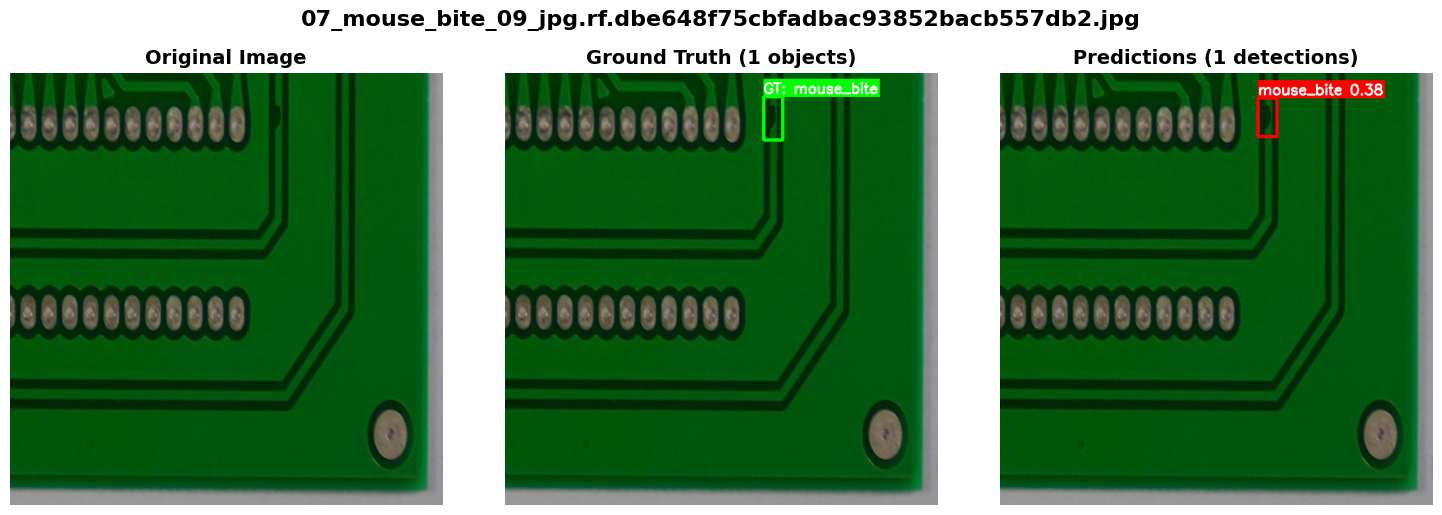

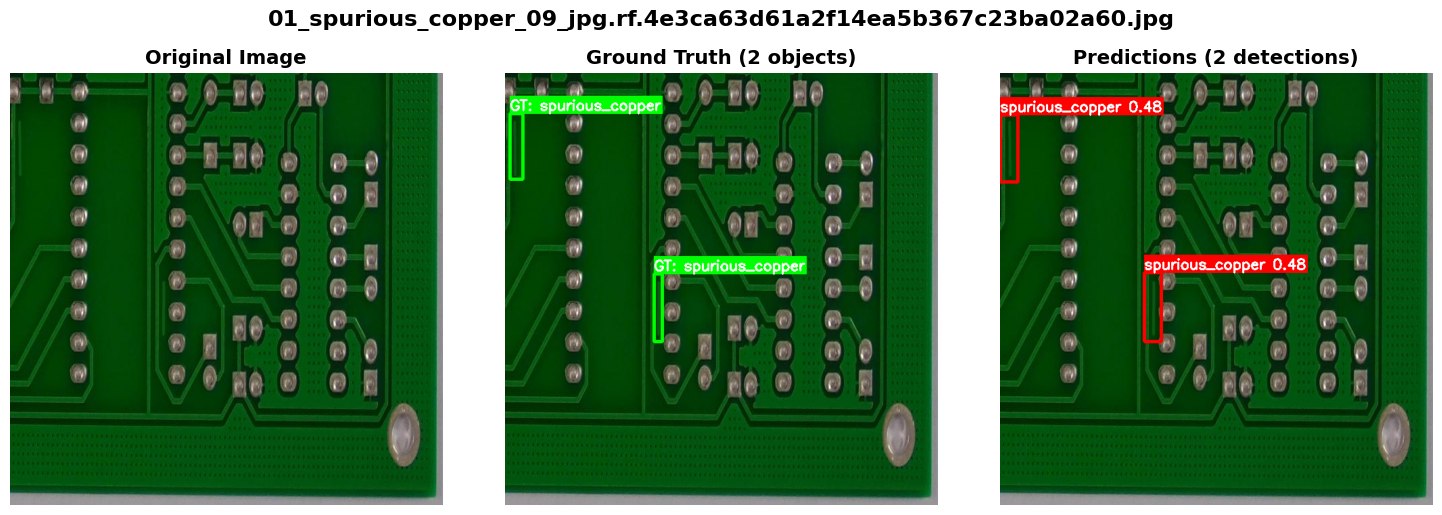

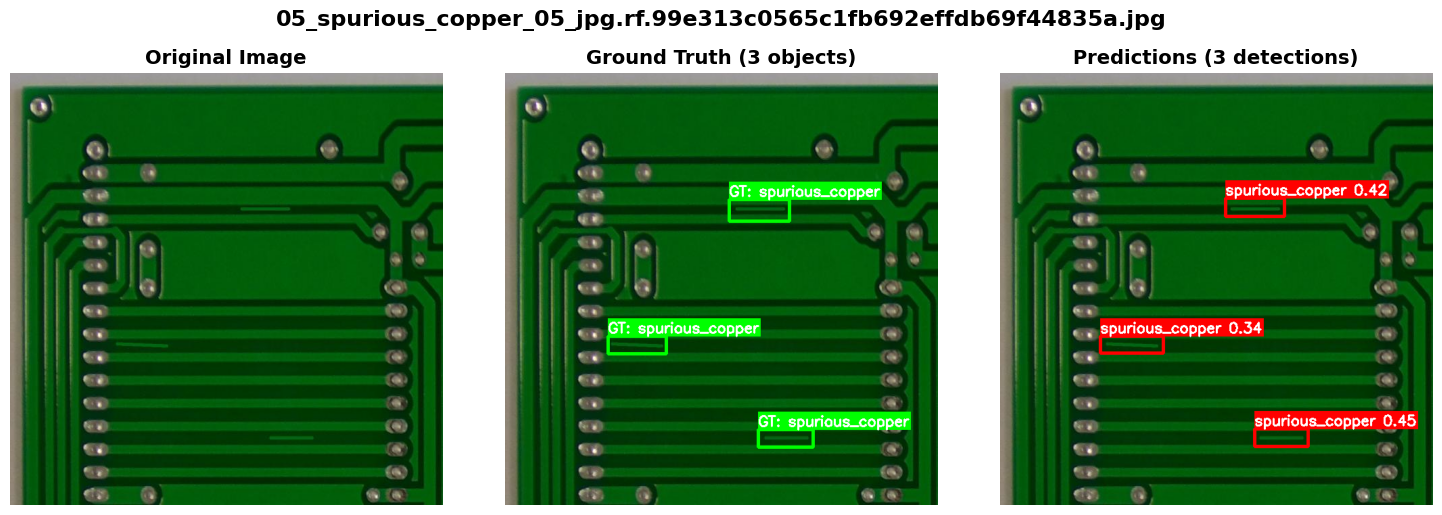

In [13]:
visualize_predict(
    model_path=best_model_path,
    test_images_dir=f"{test_path}/images",
    label_dir=f"{test_path}/labels",
    num_samples=3,  # 5개 이미지 시각화
    conf=0.25
)

Found 4 test images (no labels)


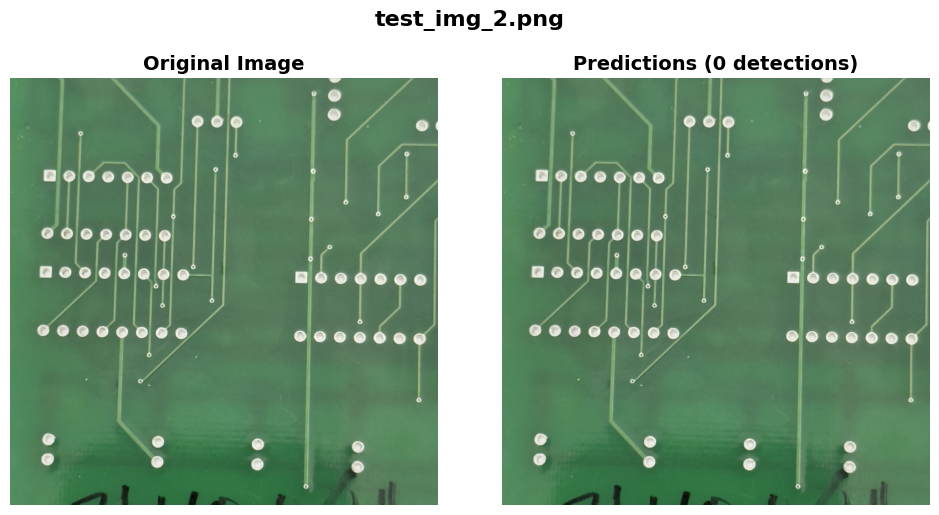

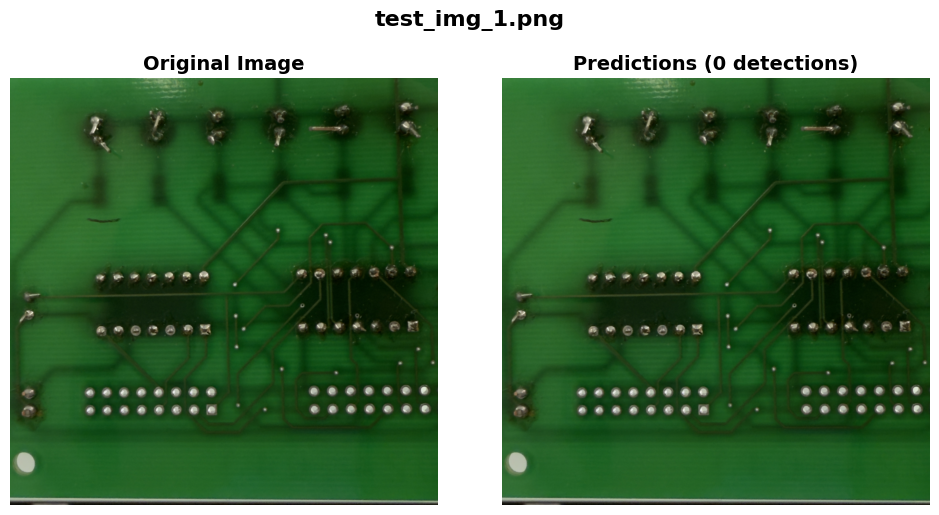

In [ ]:
inference_path = f"{PROJECT_ROOT}/dataset/test_set"
visualize_predict(
    model_path=best_model_path,
    test_images_dir=inference_path, # 실제 PCB image inference
    label_dir=None,
    num_samples=2,  # 5개 이미지 시각화
    conf=0.25
)